## Problema 4 (25 puntos)

Con otro **conjunto de datos misteriosos** (con 4 clases):

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

In [4]:
# Cargar txt en np.array y luego cargarlo a DF

data_dir = "./misterious_data_4.txt"
data_array = np.loadtxt(data_dir)
df = pd.DataFrame(data_array)

# Separar etiquetas clase y predictores
y = df.iloc[:, 0]      # primera columna como clase
X = df.iloc[:, 1:]     # el resto como variables predictoras
y, X

(0      1.0
 1      1.0
 2      1.0
 3      1.0
 4      1.0
       ... 
 254    4.0
 255    4.0
 256    4.0
 257    4.0
 258    4.0
 Name: 0, Length: 259, dtype: float64,
           1         2         3         4         5         6         7    \
 0   -0.091116  0.013830  0.013830 -0.091116 -0.077461 -0.001070 -0.001070   
 1   -1.190149 -1.362728 -1.362728 -1.190149 -1.167313 -1.383999 -1.383999   
 2   -0.973911 -1.307491 -1.307491 -0.973911 -0.954853 -1.323990 -1.323990   
 3   -0.409105 -0.916418 -0.916418 -0.409105 -0.397199 -0.921831 -0.921831   
 4   -0.713210 -0.826806 -0.826806 -0.713210 -0.687327 -0.851071 -0.851071   
 ..        ...       ...       ...       ...       ...       ...       ...   
 254 -0.964179 -1.759187 -1.759187 -0.964179 -0.935630 -1.789323 -1.789323   
 255 -0.921067 -1.249297 -1.249297 -0.921067 -0.891390 -1.278240 -1.278240   
 256 -1.932308 -0.743433 -0.743433 -1.932308 -1.895118 -0.769980 -0.769980   
 257 -1.084925 -0.493736 -0.493736 -1.084925 -1.0

1. Seleccionen un modelo de clasificación **(que no sea SVM)** y utilicen el método **filter** para reducir el número de características. Prueben limitando el número de características a:  
   `10, 20, 30, 40, ..., 100`

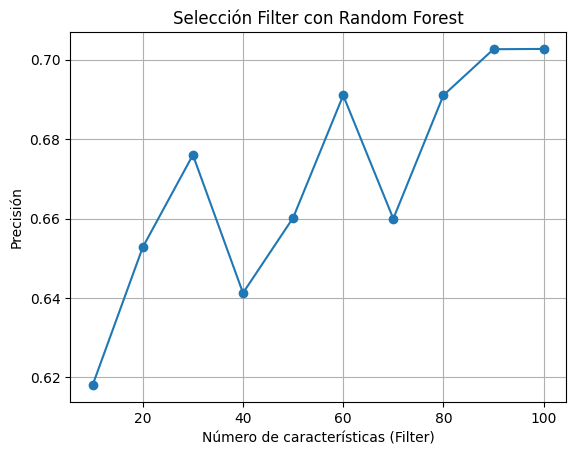

In [5]:
# Usando Random Forest
"""
Filter Selecciona características basándose en su relevancia estadística respecto a la variable objetivo 
como analysis of variance, F-value, mutual information
"""
results_filter = []

for k in range(10, 101, 10):
    selector = SelectKBest(score_func=f_classif, k=k) # Use ANOVA
    X_selected = selector.fit_transform(X, y)

    clf = RandomForestClassifier(random_state=42)
    score = cross_val_score(clf, X_selected, y, cv=5).mean()

    results_filter.append((k, score))

# Graficar
ks, scores = zip(*results_filter)
plt.plot(ks, scores, marker='o')
plt.xlabel('Número de características (Filter)')
plt.ylabel('Precisión')
plt.title('Selección Filter con Random Forest')
plt.grid(True)
plt.show()

2. Utilicen el método de **selección de características secuencial (Wrapper)** para reducir el número de características. Prueben con los siguientes límites:  
   `1, 2, 3, 4, 5, 6, 7, 8, 9, 10`

In [8]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


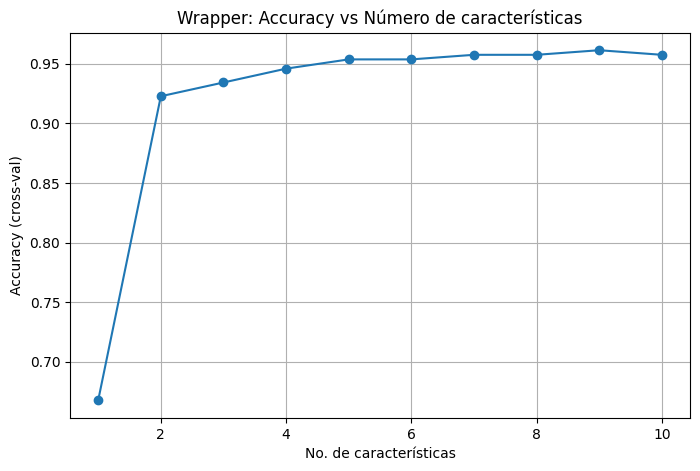

In [13]:

results_wrapper = []

clf = RandomForestClassifier(random_state=42)

for k in range(1, 11):
    sfs = SequentialFeatureSelector(clf, n_features_to_select=k, direction='forward', cv=5, n_jobs=-1)
    sfs.fit(X, y)

    X_selected = sfs.transform(X)
    score = cross_val_score(clf, X_selected, y, cv=5).mean()

    results_wrapper.append((k, score))

# Graficar resultados
ks, scores = zip(*results_wrapper)
plt.figure(figsize=(8, 5))
plt.plot(ks, scores, marker='o')
plt.title("Wrapper: Accuracy vs Número de características")
plt.xlabel("No. de características")
plt.ylabel("Accuracy (cross-val)")
plt.grid(True)
plt.show()


3. Utilicen el método de **selección de características recursivo (Filter-Wrapper)** para reducir el número de características. Prueben con los siguientes límites:  
   `1, 2, 3, 4, 5, 6, 7, 8, 9, 10`

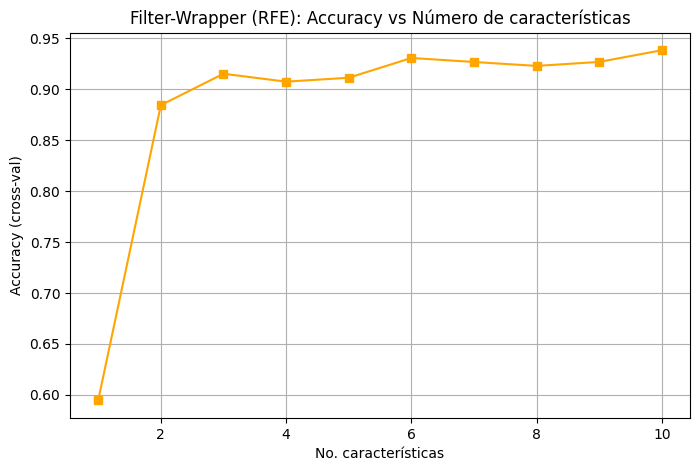

In [14]:
from sklearn.feature_selection import RFE

results_filter_wrapper = []

clf = RandomForestClassifier(random_state=42)

for k in range(1, 11):
    rfe = RFE(estimator=clf, n_features_to_select=k)
    rfe.fit(X, y)

    X_selected = rfe.transform(X)
    score = cross_val_score(clf, X_selected, y, cv=5).mean()

    results_filter_wrapper.append((k, score))

# Graficar resultados
ks_rfe, scores_rfe = zip(*results_filter_wrapper)
plt.figure(figsize=(8, 5))
plt.plot(ks_rfe, scores_rfe, marker='s', color='orange')
plt.title("Filter-Wrapper (RFE): Accuracy vs Número de características")
plt.xlabel("No. características")
plt.ylabel("Accuracy (cross-val)")
plt.grid(True)
plt.show()


- ¿Qué método les permitió obtener un menor número de características?
    - Filter-Wrapper
- ¿Cuál método consideras que es más rápido para encontrar una solución?
    - Filter wrapper, ya que tardó 1/3 de lo que tardó wrapper